In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv")

In [4]:
print("Data Preview:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Data Preview:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Missing values:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [5]:
# Drop rows with missing values (or handle them as needed)
df.dropna(inplace=True)

In [6]:
# Separate features and target
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [7]:
# Define categorical and numerical columns
categorical_features = ["Gender", "Education Level", "Job Title"]
numerical_features = ["Age", "Years of Experience"]

In [8]:
# Preprocessing with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder='passthrough'  # Leave numerical features as is
)

In [9]:
# Build the pipeline with Decision Tree Regressor
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Fit the model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
# Predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluation
print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Squared Error: 62880281.55320782
R² Score: 0.9779480342968083


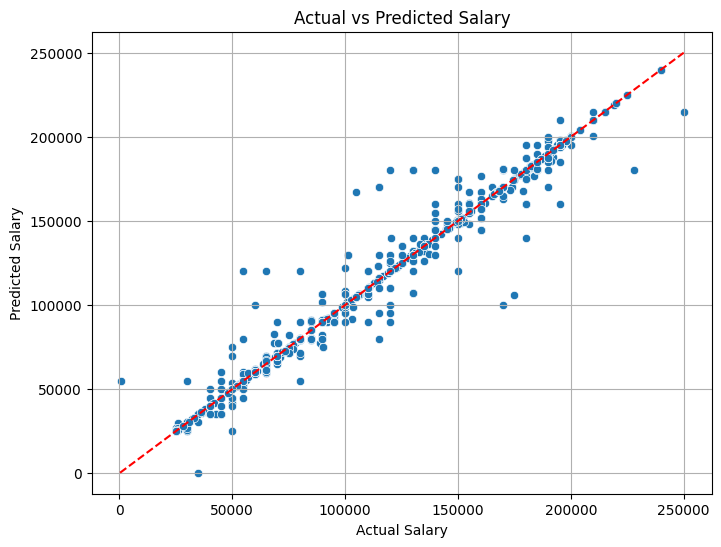

In [14]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()